Plot saved to: component/finalResult/NoTODS/scheduling_metrics_plot_3.pdf


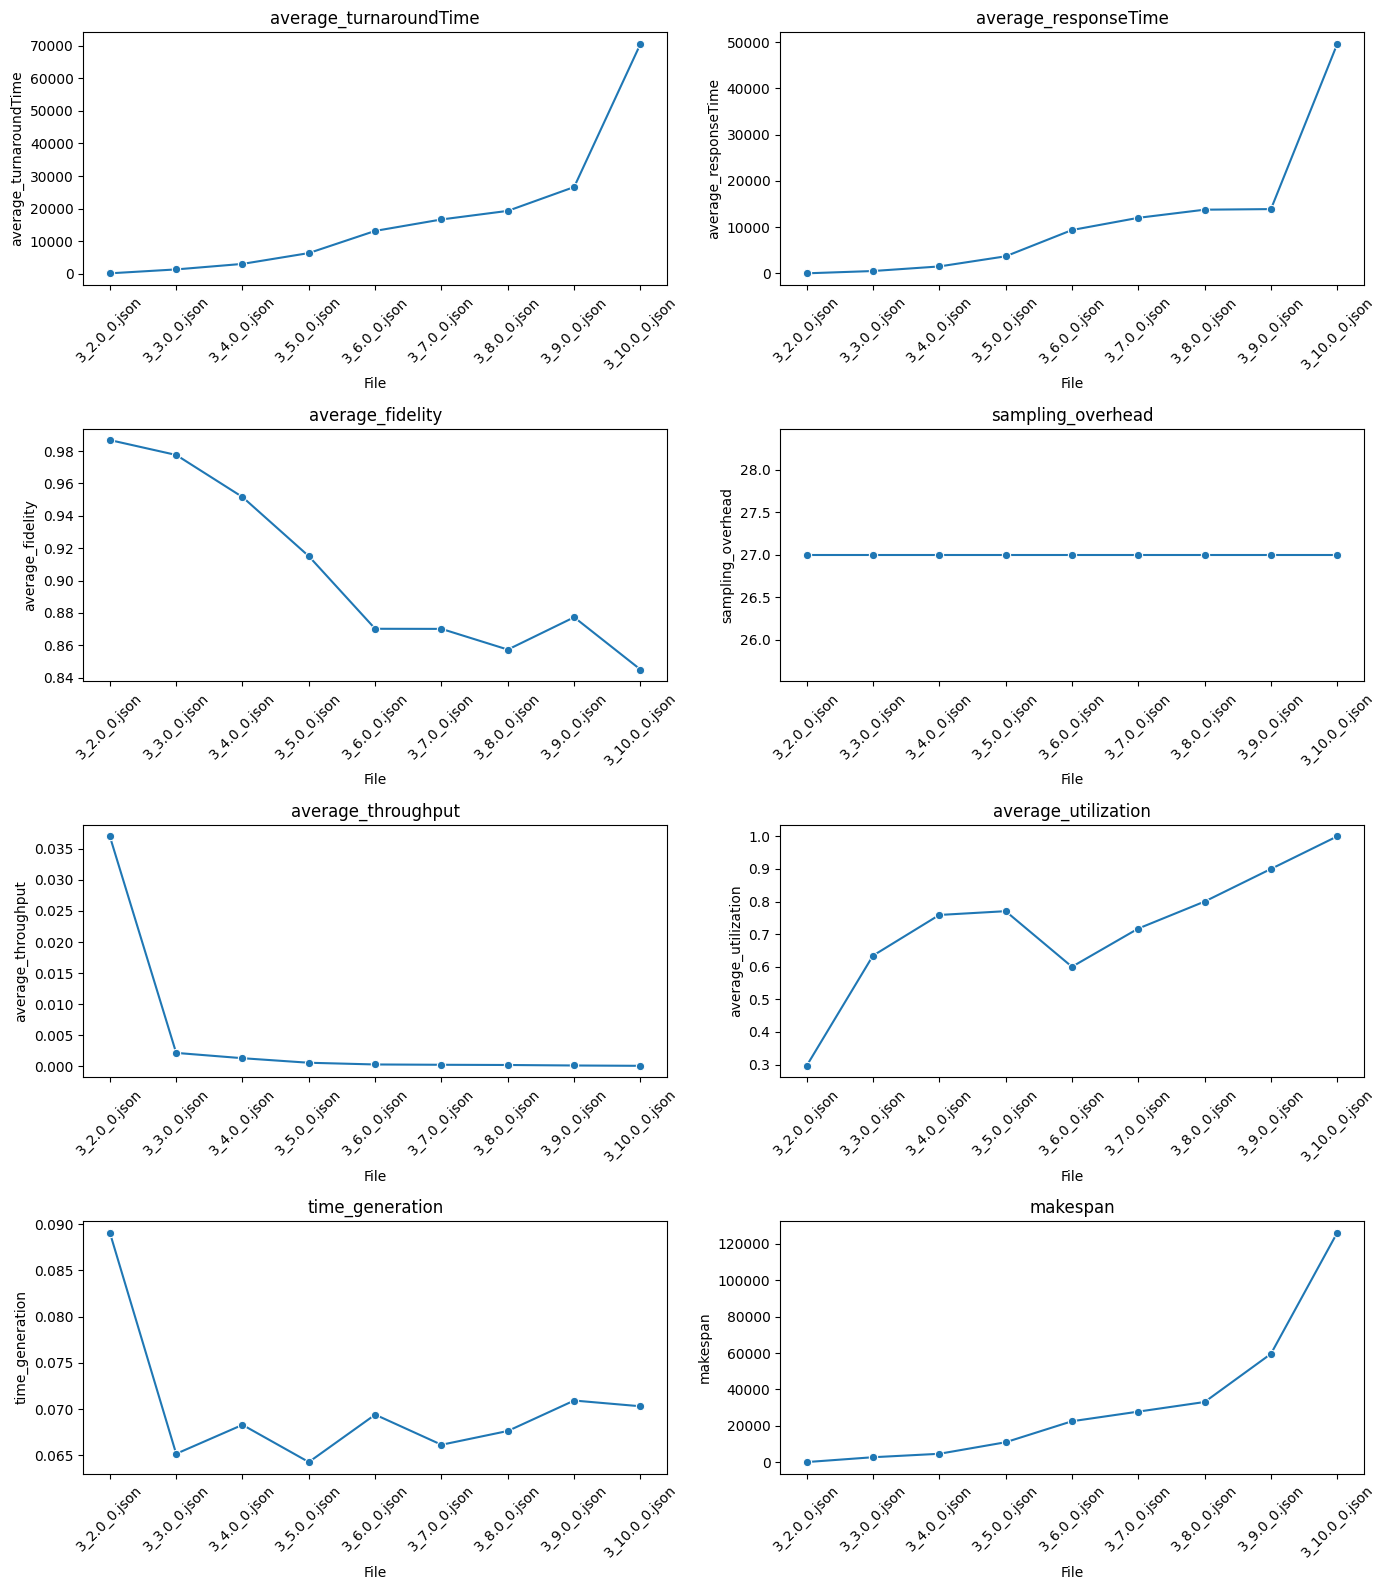

In [1]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define the folder where your JSON files are stored
folder_path = os.path.join("component", "finalResult", "NoTODS")

num_circuit = 3

# Regex pattern to match filenames like 3_2.0_0.json, 3_10.0_0.json, etc.
pattern = re.compile(rf"{num_circuit}_(\d+)\.0_0\.json")

# Metrics to extract from each JSON file
metrics = [
    "average_turnaroundTime",
    "average_responseTime",
    "average_fidelity",
    "sampling_overhead",
    "average_throughput",
    "average_utilization",
    "time_generation",
    "makespan"
]

# Read data from matching JSON files
data = []
for file in os.listdir(folder_path):
    if pattern.match(file):
        with open(os.path.join(folder_path, file), "r") as f:
            content = json.load(f)
            entry = {metric: content.get(metric, None) for metric in metrics}  # Use .get() to avoid KeyErrors
            entry["filename"] = file
            data.append(entry)

if not data:
    print("No matching files found. Please check the folder and regex pattern.")
    exit()

# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Sort by numeric order based on the filename
df["sort_key"] = df["filename"].str.extract(rf"{num_circuit}_(\d+)\.0_0\.json")[0].astype(int)
df = df.sort_values(by="sort_key")

# Create subplots for each metric
num_rows = math.ceil(len(metrics) / 2)  # Calculate required rows
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy iteration

for i, metric in enumerate(metrics):
    sns.lineplot(ax=axes[i], data=df, x="filename", y=metric, marker="o")
    axes[i].set_title(metric)
    axes[i].set_xlabel("File")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
# Hide any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save to PDF
plt.tight_layout()
pdf_output_path = os.path.join(folder_path, "scheduling_metrics_plot.pdf")

# Ensure the filename is unique if the file already exists
if os.path.exists(pdf_output_path):
    base_name, ext = os.path.splitext(pdf_output_path)
    counter = 1
    while os.path.exists(f"{base_name}_{counter}{ext}"):
        counter += 1
    pdf_output_path = f"{base_name}_{counter}{ext}"
plt.savefig(pdf_output_path)

print(f"Plot saved to: {pdf_output_path}")

Comparison plot saved to: component/finalResult/scheduling_metrics_comparison_plot_2.pdf


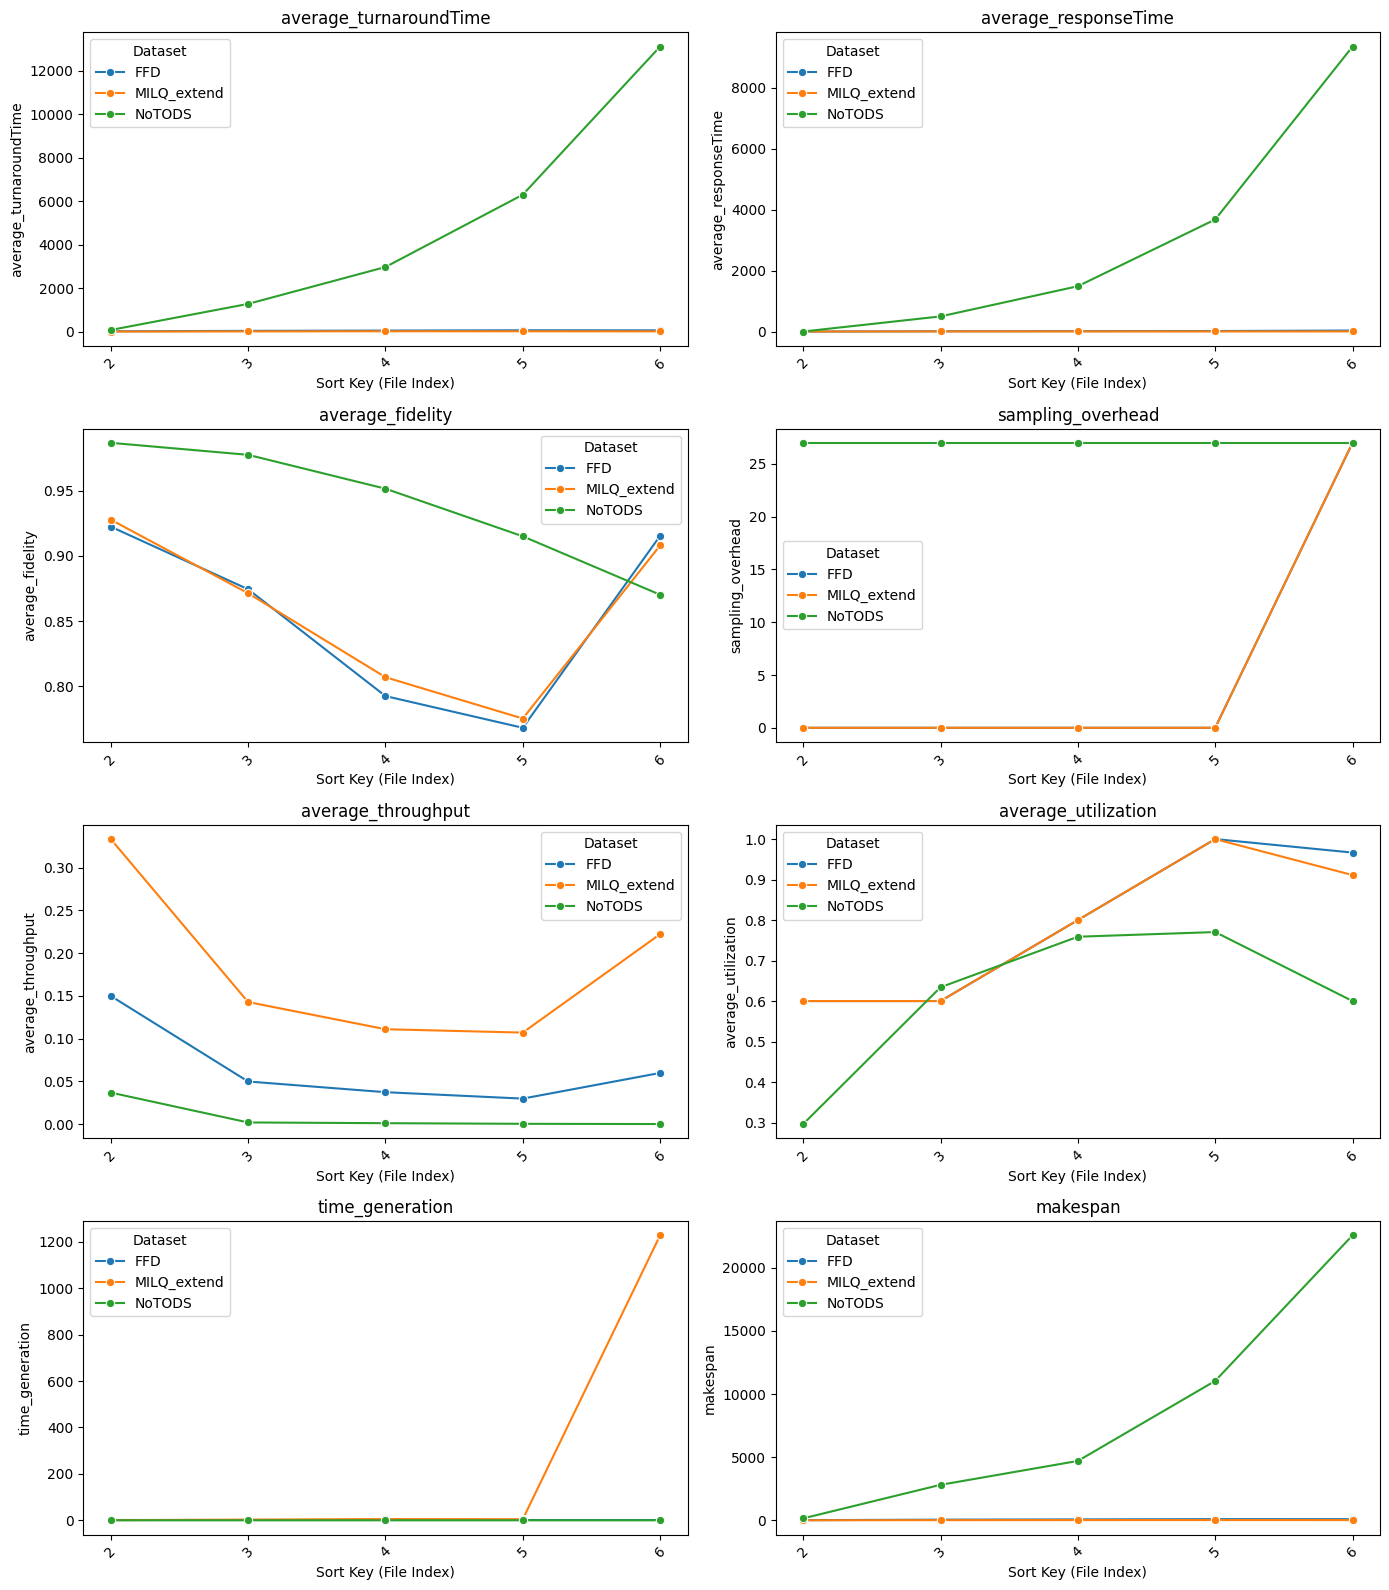

In [8]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define folders for the datasets
folder_paths = {
    "FFD": os.path.join("component", "finalResult", "FFD"),
    "MILQ_extend": os.path.join("component", "finalResult", "MILQ_extend"),
    "NoTODS": os.path.join("component", "finalResult", "NoTODS")
}
num_circuit = 3

# Regex pattern to match filenames like 3_0.0_0.json to 3_6.0_0.json
pattern = re.compile(rf"{num_circuit}_([0-6])\.0_0\.json")

# Metrics to extract from each JSON file
metrics = [
    "average_turnaroundTime",
    "average_responseTime",
    "average_fidelity",
    "sampling_overhead",
    "average_throughput",
    "average_utilization",
    "time_generation",
    "makespan"
]

# Read data from all datasets
data = []
for dataset_name, folder_path in folder_paths.items():
    for file in os.listdir(folder_path):
        if pattern.match(file):
            with open(os.path.join(folder_path, file), "r") as f:
                content = json.load(f)
                entry = {metric: content.get(metric, None) for metric in metrics}  # Use .get() to avoid KeyErrors
                entry["filename"] = file
                entry["dataset"] = dataset_name  # Add dataset name
                data.append(entry)

if not data:
    print("No matching files found in any folder. Please check the folders and regex pattern.")
    exit()

# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Sort by numeric order based on the filename
df["sort_key"] = df["filename"].str.extract(rf"{num_circuit}_(\d+)\.0_0\.json")[0].astype(int)
df = df.sort_values(by=["sort_key", "dataset"])

# Create subplots for each metric
num_rows = math.ceil(len(metrics) / 2)  # Calculate required rows
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy iteration

for i, metric in enumerate(metrics):
    sns.lineplot(ax=axes[i], data=df, x="sort_key", y=metric, hue="dataset", marker="o")
    axes[i].set_title(metric)
    axes[i].set_xlabel("Sort Key (File Index)")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    axes[i].legend(title="Dataset")
    
# Hide any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save to PDF
plt.tight_layout()
pdf_output_path = os.path.join("component", "finalResult", "scheduling_metrics_comparison_plot.pdf")

# Ensure the filename is unique if the file already exists
if os.path.exists(pdf_output_path):
    base_name, ext = os.path.splitext(pdf_output_path)
    counter = 1
    while os.path.exists(f"{base_name}_{counter}{ext}"):
        counter += 1
    pdf_output_path = f"{base_name}_{counter}{ext}"
plt.savefig(pdf_output_path)

print(f"Comparison plot saved to: {pdf_output_path}")